**Importing Libraries and Data**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [22]:
df = pd.read_csv('creditcard.csv')

In [23]:
df.head()   #the data was anonymized

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Preprocessing**

Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['NormalizedAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop(columns=['Amount','Time'],axis=1)  #removing Time column too

In [25]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


Splitting into Training and Testing

In [26]:
X = df.drop(columns=['Class'])
y = df['Class']

In [27]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [30]:
X_train.shape

(199364, 29)

In [31]:
X_test.shape

(85443, 29)

**Deep Learning Model**

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense


model = Sequential()
model.add(Dense(units=16,input_dim=29, activation='relu'))
model.add(Dense(units=24, activation='relu')) 
model.add(Dropout(0.5))  
model.add(Dense(20,activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 38s 3ms/step - loss: 0.0087 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 37s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 34s 3ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0033 - accuracy: 0.9994


In [34]:
score=model.evaluate(X_test,y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0035 - accuracy: 0.9993


In [35]:
print(score)

[0.003463572822511196, 0.9993094801902771]


**Evaluating the Deep Learning Model**

In [36]:
y_pred = model.predict(X_test)
y_test_dataframe = pd.DataFrame(y_test)

2671/2671 [==============================] - 4s 1ms/step


In [37]:
y_pred.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

<AxesSubplot: >

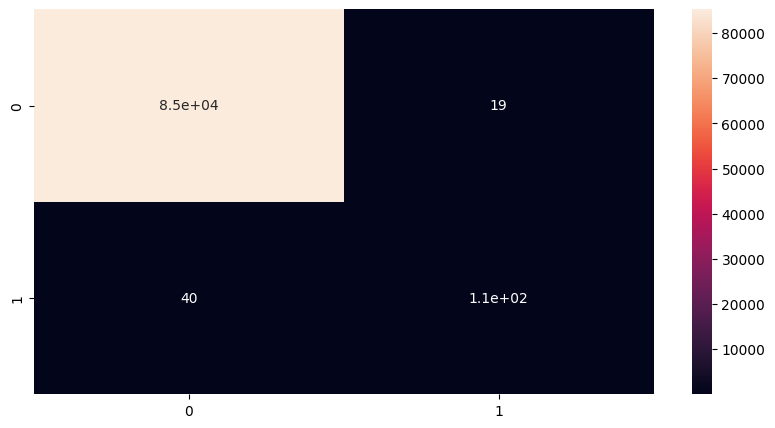

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_dataframe,y_pred.round())
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)

8901/8901 [==============================] - 16s 2ms/step


<AxesSubplot: >

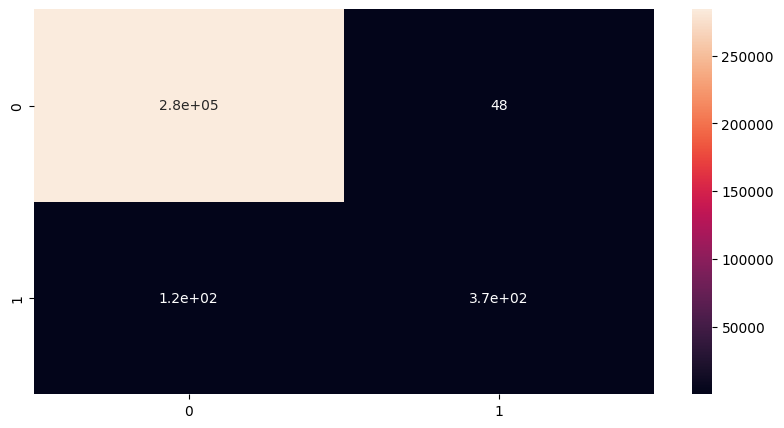

In [39]:
#plotting confusion matrix for entire data
y_predicted = model.predict(X)
y_expected = pd.DataFrame(y)
cm1 = confusion_matrix(y_expected,y_predicted.round())
plt.figure(figsize=(10,5))
sns.heatmap(cm1,annot=True)

**Random Forest Model**

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
classifier.score(X_test,y_test)

0.9995201479348805

<AxesSubplot: >

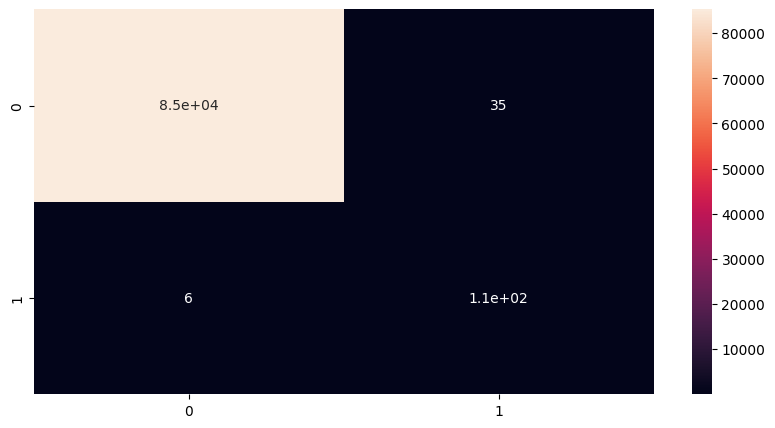

In [44]:
cm2 = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm2,annot=True)

<AxesSubplot: >

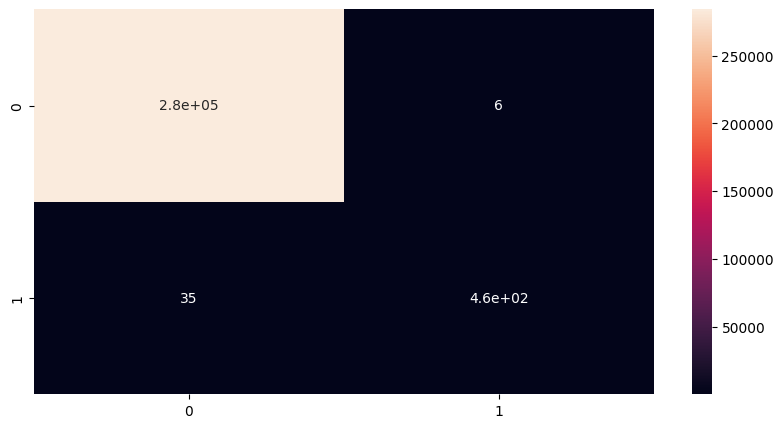

In [45]:
#plotting confusion matrix for entire data
y_predicted_rf = classifier.predict(X)
cm3 = confusion_matrix(y,y_predicted_rf)
plt.figure(figsize=(10,5))
sns.heatmap(cm3,annot=True)

**Decision Tree Model**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dc_classifier = DecisionTreeClassifier()

dc_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred = dc_classifier.predict(X_test)

In [48]:
dc_classifier.score(X_test,y_test)

0.9992860737567735

<AxesSubplot: >

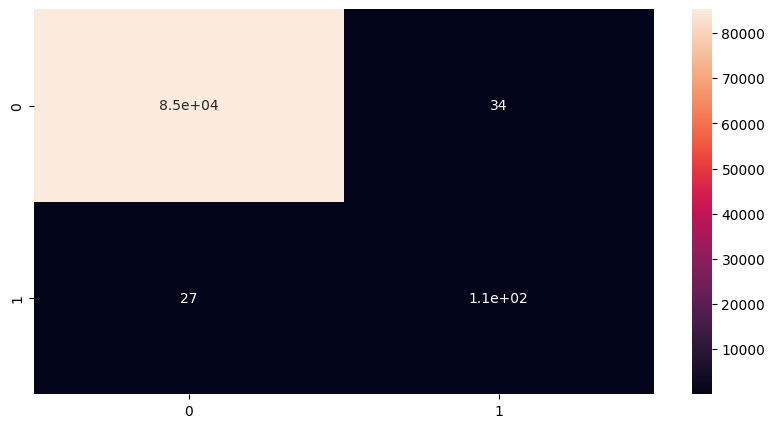

In [49]:
cm4 = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm4,annot=True)

<AxesSubplot: >

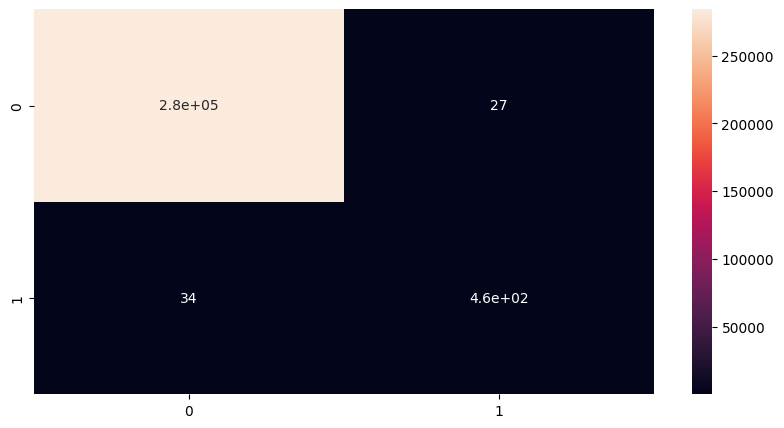

In [50]:
#plotting confusion matrix for entire data
y_predicted_dc = dc_classifier.predict(X)
cm5 = confusion_matrix(y,y_predicted_dc)
plt.figure(figsize=(10,5))
sns.heatmap(cm5,annot=True)